# House Regression

In [13]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

### Read in Data

In [14]:
df = (
    pd.read_csv(Path("../Resources/USA_Housing.csv"))
    .set_index("Avg. Area Number of Rooms")
    .sort_index()
)
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Area Population,Price,Address
Avg. Area Number of Rooms,,,,,,
3.236194,74277.719901,6.987280,3.42,50233.790310,1.365081e+06,"9835 Kimberly Street Suite 318\nMurphyview, ND..."
3.950225,66961.664415,7.412989,2.31,33423.293292,1.128720e+06,"456 Gray Extension Suite 249\nJeremyville, MA ..."


### Plot the Data

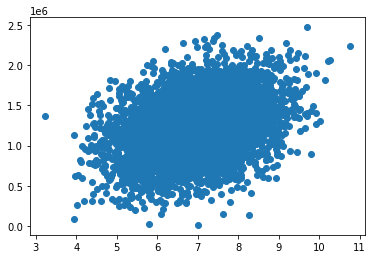

In [15]:
# Create a scatter plot of the data
plt.scatter(df.index, df.Price)

## Create a SciKitLearn Linear Regression Model

In [16]:
# Create a Linear Regression Model using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## Fit the Model to the Data

In [17]:
df.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Area Population,Price,Address
Avg. Area Number of Rooms,,,,,,
3.236194,74277.719901,6.98728,3.42,50233.79031,1.365081e+06,"9835 Kimberly Street Suite 318\nMurphyview, ND..."


In [18]:
# Separate the data into the X and y componenents
# In this case, y will be the `Price` and X will be the remainign columns
x = df.index.values.reshape(-1, 1)
# x = df.drop(columns=["Price", "Address"]).values.reshape(-1, 1)

y = df.Price.values.reshape(-1, 1)

x

array([[ 3.23619402],
       [ 3.95022469],
       [ 3.95097265],
       ...,
       [10.21990198],
       [10.28002242],
       [10.75958834]])

In [19]:
# Fit the model to the data
model.fit(x, y)

LinearRegression()

## Make Predictions

In [8]:
# Make predictions using the X data
predicted_y_values = model.predict(x)

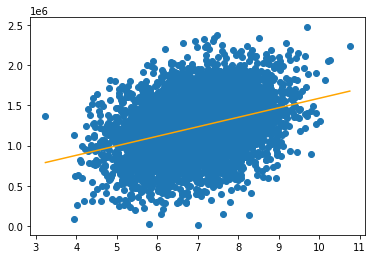

In [9]:
# Plot X and y as a scatter plot
# Plot X and the predictions as a red line plot
plt.scatter(x, y)
plt.plot(x, predicted_y_values, color="orange")

### Extract the slope, intercept, and calculate the R2 score of the model

In [20]:
# Show the slope of the model
print(model.coef_)
# y = M * x + b

[[117841.63757442]]


In [21]:
# Show the intercept of the model
print(model.intercept_)

[408619.81940217]


In [22]:
# Calculate the R2 Score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
model.score(x, y, sample_weight=None)


0.11267062525400562